In [1]:
using Plots
using HDF5
using Distributed
using LinearAlgebra
using Interact
pyplot()

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3698455590570078258\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9931293274962001198\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/fa2648b84ae386a9c09503776cfef878aabb1f66-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-3698455590570078258\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

Plots.PyPlotBackend()

In [2]:
const mass = 2000
const nsts = 20

20

In [3]:
###### LOAD FROM ZERO
cd("..")
include("general_functions.jl")
include("potentials.jl")
include("types.jl")
include("adiabatic_values.jl")
include("type_builder.jl")
include("plotting.jl")

multi_SH_prob (generic function with 2 methods)

In [4]:
potential(R)=pot_2D_sinus(R,0.005)
R0=[0,0]
p0=[0,0]
C0=zeros(Complex,nsts)
C0[1]=1

1

In [5]:
res=200
xrange=[-20,20]
yrange=[-20,20]

R=energies_4_plot([xrange[1],yrange[1]],[xrange[2],yrange[2]],[res,res]);
Xbase=[R[i][1] for i in 1:res];
E=[R[i][k] for i in 1:res, k in 2:nsts+1]; #E[:,i] will be the i-th adiabatic PES


X=range(xrange[1],stop=xrange[2],length=res);
Y=range(yrange[1],stop=yrange[2],length=res);

for st in 1:nsts
    E_string="E$(st)=[R[i,j][2+$(st)] for i in 1:length(X), j in 1:length(Y)]"
    eval(Meta.parse(E_string))
end

In [6]:
P1=surface(X,Y,E1)
for i in 2:nsts
    sur_string="surface!(X,Y,E$(i))"
    eval(Meta.parse(sur_string))
end

In [7]:
R=energies_4_plot([-20,-20],[25,25],[225,225]);
GAMMA=zeros(Float64,size(R))
for (i,r) in enumerate(R)
    ~,G,~,~,~,~=adiabatic_values(r[1:NDOFs],NDOFs)
    GAMMA[i]=G[2][1,2]
end

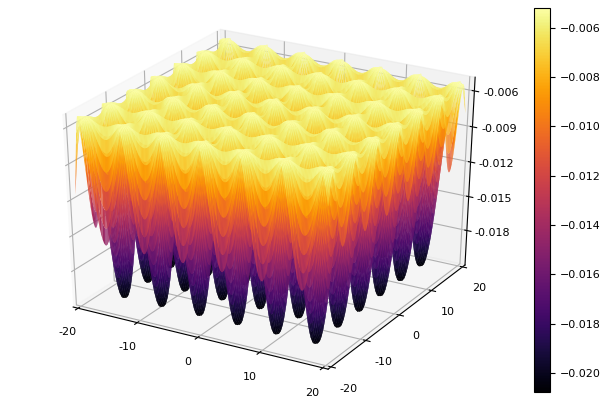

In [8]:
#GROUND STATE SURFACE
surface(X,Y,E1)

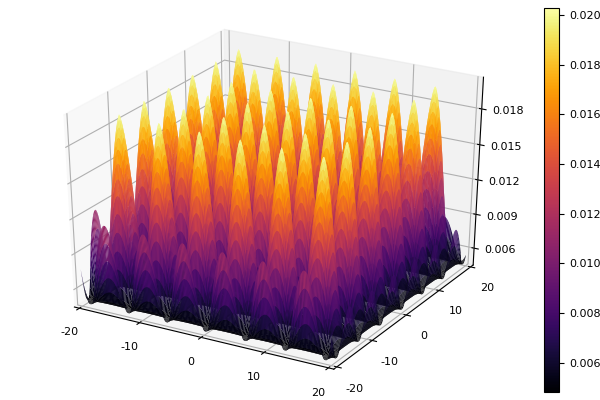

In [9]:
surface(X,Y,E11)

In [ ]:
?xticks!

In [ ]:
contour(X,Y,E1)
xticks!([(2k+1)*pi for k in -3:3])
yticks!([(2k+1)*pi for k in -3:3])

In [ ]:
contour(X,Y,E10)

In [ ]:
contour(X,Y,E11)

In [ ]:
#ALL ENERGIES SURFACE
P1
surface!(xticks=false)

P1

In [10]:
@manipulate for y in 1:length(Y)
    PP=plot(X,E1[:,y],legend=false,title="y=$(Y[y])")
    for i in 2:nsts
        pltstring="plot!(X,E$(i)[:,$y])"
        eval(Meta.parse(pltstring))
    end
    ylims!(-0.022,0.022)

    PP
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-0b8fdb35-efd6-48f6-9a37-89eb1dcb411c", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["y"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>200,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
100, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/nacho/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/nacho/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/nacho/.julia/packages/InteractBase/R8JgH/src/../assets/all.js"), Asset("css", nothing, "/home/nacho/.julia/packages/InteractBase/R8JgH/src/../assets/style.css"), Asset("css", nothing, "/home/nacho/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"77\",\"78\",\"79\",\"80\",\"81\",\"82\",\"83\